# OWOR WILBROAD
2200701450         2022/HD05/1450U
## MASTER OF SCIENCE IN COMPUTER SCIENCE
COMPUTER VISION END OF SEMESTER PROJECT EXAM

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
import seaborn as sn
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_243_116_13_776_971.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_233_391_256_639_546.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_216_13_269_404_691.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_239_45_377_375_578.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_196_591_179_800_475.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_191_393_230_668_343.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_264_407_372_794_718.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_212_8_8_789_976.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_194_420_237_789_375.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_220_27_66_552_739.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_197_581_187_792_475.jpg
/kaggle/input/owor-crop-dataset/cropped-images/cassava/frame_242_13_8_784_

In [3]:
def get_image_shape(image_path):
    image = cv2.imread(image_path)
    return image.shape

# Set the path to the dataset folder
dataset_path = "/kaggle/input/owor-crop-dataset/cropped-images"

# Get the list of class folders
class_folders = os.listdir(dataset_path)

# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = os.listdir(class_path)

    # Display the shape of each image in the class folder
    print(f"Class: {class_folder}")
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_shape = get_image_shape(image_path)
        print(f"Image: {image_file} - Shape: {image_shape}")

    print()


Class: cassava
Image: frame_243_116_13_776_971.jpg - Shape: (958, 660, 3)
Image: frame_233_391_256_639_546.jpg - Shape: (290, 248, 3)
Image: frame_216_13_269_404_691.jpg - Shape: (422, 391, 3)
Image: frame_239_45_377_375_578.jpg - Shape: (201, 330, 3)
Image: frame_196_591_179_800_475.jpg - Shape: (296, 209, 3)
Image: frame_191_393_230_668_343.jpg - Shape: (113, 275, 3)
Image: frame_264_407_372_794_718.jpg - Shape: (346, 387, 3)
Image: frame_212_8_8_789_976.jpg - Shape: (968, 781, 3)
Image: frame_194_420_237_789_375.jpg - Shape: (138, 369, 3)
Image: frame_220_27_66_552_739.jpg - Shape: (673, 525, 3)
Image: frame_197_581_187_792_475.jpg - Shape: (288, 211, 3)
Image: frame_242_13_8_784_974.jpg - Shape: (966, 771, 3)
Image: frame_217_24_266_702_831.jpg - Shape: (565, 678, 3)
Image: frame_263_523_393_715_596.jpg - Shape: (203, 192, 3)
Image: frame_226_32_58_356_369.jpg - Shape: (311, 324, 3)
Image: frame_261_647_240_800_528.jpg - Shape: (288, 153, 3)
Image: frame_234_11_406_422_604.jpg - Sh

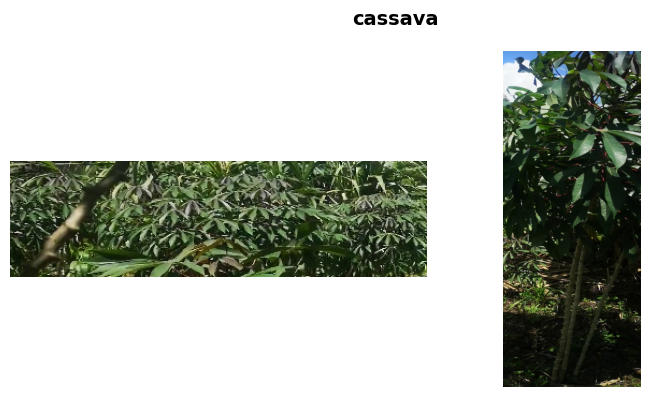

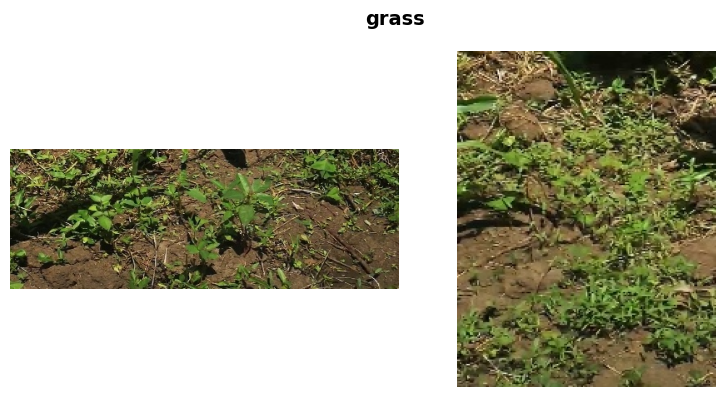

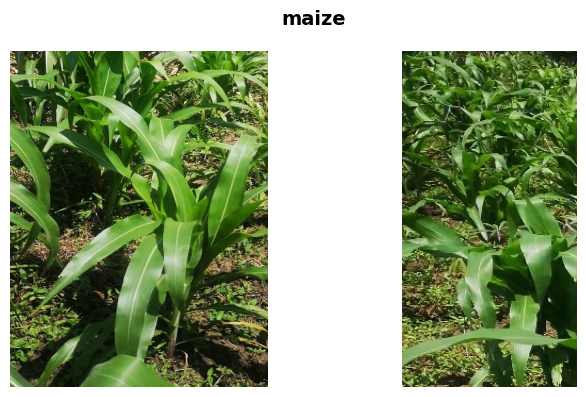

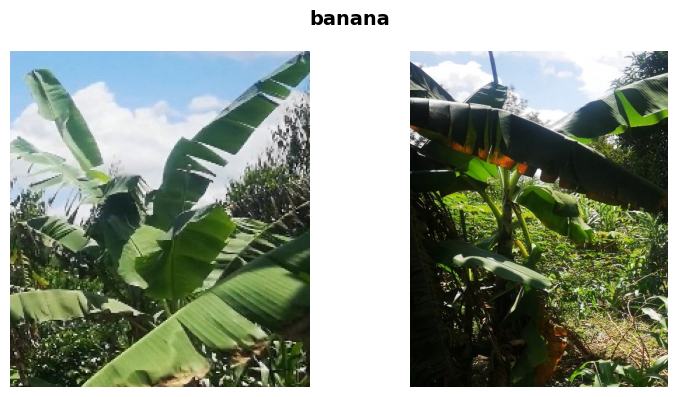

In [4]:
# Set the path to the dataset folder
dataset_path = "/kaggle/input/owor-crop-dataset/cropped-images"

# Get the list of class folders
class_folders = os.listdir(dataset_path)

# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = os.listdir(class_path)

    # Randomly select two image files
    random_images = random.sample(image_files, 2)

    # Create a new line plot for the current class
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Display the selected images
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(class_path, image_file)
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')

    # Set the title of the plot to the class name
    fig.suptitle(class_folder, fontsize=14, fontweight='bold')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot for the current class
    plt.show()

In [5]:
# Set the path to the dataset folder
dataset_path = "/kaggle/input/owor-crop-dataset/cropped-images"

# Get the list of class folders
class_folders = os.listdir(dataset_path)

# Define the number of bins for each color channel in the histogram
bins = 8

# Initialize an empty list to store the features and labels
features = []
labels = []

# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = os.listdir(class_path)

    # Iterate over each image file
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)

        # Compute the color histogram
        hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 180, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        # Append the features and label to the lists
        features.append(hist)
        labels.append(class_folder)

# Convert the features and labels to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Print the shape of the features and labels arrays
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (222, 512)
Labels shape: (222,)


In [6]:
features = pd.DataFrame(features)
features['label'] = labels

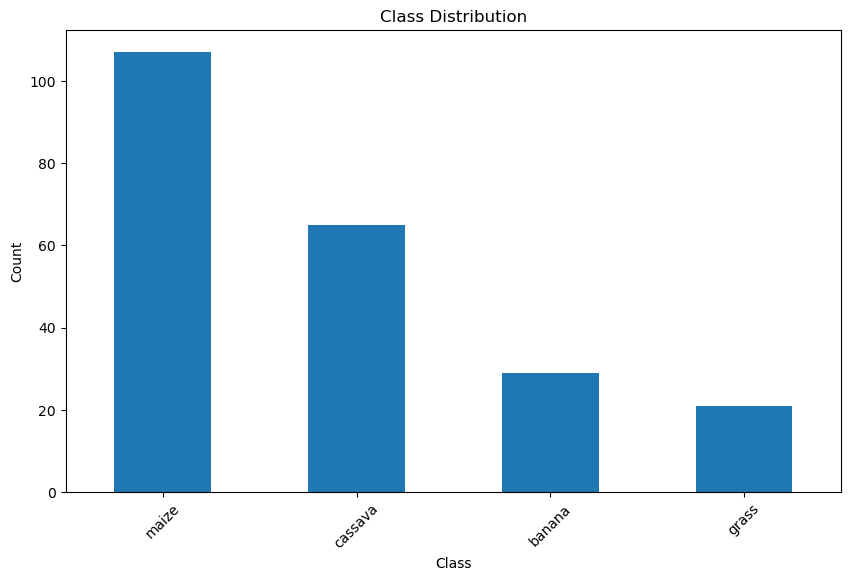

In [7]:
# Calculate the class distribution
class_distribution = features['label'].value_counts()

# Create a bar chart for the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [8]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,0.862702,0.028809,0.002371,0.00038,0.0,0.0,0.0,0.0,0.400930,0.141950,...,0.001585,0.0,0.0,0.0,0.0,0.0,0.000000,0.001005,0.000237,cassava
1,0.714006,0.032268,0.000275,0.00000,0.0,0.0,0.0,0.0,0.511064,0.120237,...,0.000092,0.0,0.0,0.0,0.0,0.0,0.000046,0.000961,0.000183,cassava
2,0.779114,0.035618,0.000136,0.00000,0.0,0.0,0.0,0.0,0.370455,0.368802,...,0.001789,0.0,0.0,0.0,0.0,0.0,0.000000,0.001089,0.000758,cassava
3,0.585444,0.040955,0.000000,0.00000,0.0,0.0,0.0,0.0,0.518386,0.321574,...,0.000569,0.0,0.0,0.0,0.0,0.0,0.000063,0.003287,0.001074,cassava
4,0.855750,0.000731,0.000000,0.00000,0.0,0.0,0.0,0.0,0.267264,0.164066,...,0.007243,0.0,0.0,0.0,0.0,0.0,0.000000,0.003921,0.001130,cassava


In [9]:
# Drop the label column from the features DataFrame
features = features.drop('label', axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

#Normalise the data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the normalized features
print("Normalized training features shape:", X_train.shape)
print("Normalized testing features shape:", X_test.shape)

Normalized training features shape: (177, 512)
Normalized testing features shape: (45, 512)


In [11]:
k = 3  # Number of neighbors to consider
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Test accuracy:  0.9111111111111111
              precision    recall  f1-score   support

      banana       1.00      0.50      0.67         4
     cassava       0.82      1.00      0.90         9
       grass       1.00      0.71      0.83         7
       maize       0.93      1.00      0.96        25

    accuracy                           0.91        45
   macro avg       0.94      0.80      0.84        45
weighted avg       0.92      0.91      0.90        45



<Axes: >

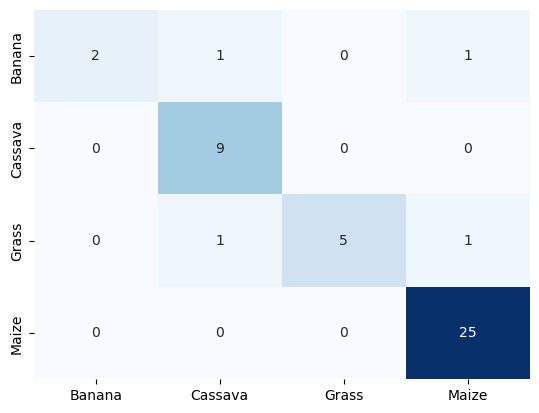

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred_test = classifier.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, pred_test))

print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)
label_names = ['Banana', 'Cassava', 'Grass', 'Maize']


sn.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
           xticklabels=label_names, yticklabels=label_names)

In [13]:
 batch_size = 16
img_height = 299
img_width = 299

dataset_dir = '/kaggle/input/owor-crop-dataset/cropped-images'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir, 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",  
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#generate test set
validation_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(validation_batches // 2)
validation_dataset = validation_dataset.skip(validation_batches // 2)

print('validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Found 222 files belonging to 4 classes.
Using 178 files for training.
Found 222 files belonging to 4 classes.
Using 44 files for validation.
validation batches: 2
test batches: 1


In [14]:
class_names = training_dataset.class_names
print(class_names)

['banana', 'cassava', 'grass', 'maize']


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

training_dataset  = training_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.25),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.2),    
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal") 
   
])

In [17]:
preprocess_input_1 = tf.keras.applications.xception.preprocess_input 

In [18]:
pretrained_model = tf.keras.applications.Xception(weights='imagenet', include_top=False,
                                                  input_shape=(299, 299, 3))


83683744/83683744 [==============================] - 0s 0us/step


In [19]:
image_batch, label_batch = next(iter(training_dataset))
feature_batch_1 = pretrained_model(image_batch)
print(feature_batch_1.shape)

(16, 10, 10, 2048)


In [20]:
global_average_layer_1 = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average_1 = global_average_layer_1(feature_batch_1)
print(feature_batch_average_1.shape)

(16, 2048)


In [21]:
prediction_layer_1 = tf.keras.layers.Dense(4)
prediction_batch_1 = prediction_layer_1(feature_batch_average_1)
print(prediction_batch_1.shape)

(16, 4)


In [22]:
pretrained_model.trainable = True

In [23]:
inputs_1 = tf.keras.Input(shape=(299, 299, 3))
x = data_augmentation(inputs_1)
x = preprocess_input_1(x)
x = pretrained_model(x, training=False)
x = global_average_layer_1(x)
#x = Dense(2048, activation='relu')(x)
x = Dropout(0.2)(x)
outputs_1 = prediction_layer_1(x)
model_1 = tf.keras.Model(inputs_1, outputs_1)

In [24]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(pretrained_model.layers))

Number of layers in the base model:  132


In [25]:
# Fine-tune from this layer onwards
fine_tune_at = 110

# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [26]:
base_learning_rate = 0.0001
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# Define learning rate reduction callback
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1
)

# Define model checkpoint callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model_checkpoint.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model_1.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[lr_reduction, model_checkpoint]
)

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.8581 - accuracy: 0.6685
Epoch 1: val_accuracy improved from -inf to 0.67857, saving model to model_checkpoint.h5
12/12 [==============================] - 16s 341ms/step - loss: 0.8581 - accuracy: 0.6685 - val_loss: 0.9438 - val_accuracy: 0.6786 - lr: 1.0000e-04
Epoch 2/10
11/12 [==========================>...] - ETA: 0s - loss: 0.3267 - accuracy: 0.8750
Epoch 2: val_accuracy improved from 0.67857 to 0.92857, saving model to model_checkpoint.h5
12/12 [==============================] - 2s 163ms/step - loss: 0.3230 - accuracy: 0.8764 - val_loss: 0.2795 - val_accuracy: 0.9286 - lr: 1.0000e-04
Epoch 3/10
11/12 [==========================>...] - ETA: 0s - loss: 0.2200 - accuracy: 0.9318
Epoch 3: val_accuracy did not improve from 0.92857
12/12 [==============================] - 1s 108ms/step - loss: 0.2175 - accuracy: 0.9326 - val_loss: 0.2626 - val_accuracy: 0.9286 - lr: 1.0000e-04
Epoch 4/10
11/12 [=======================

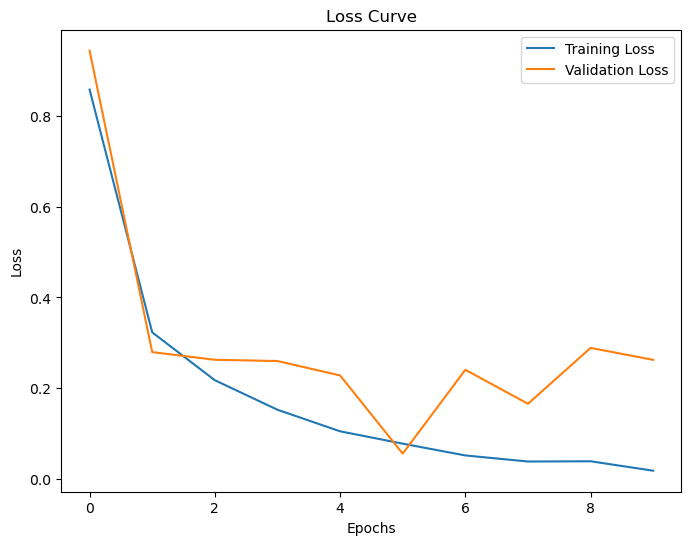

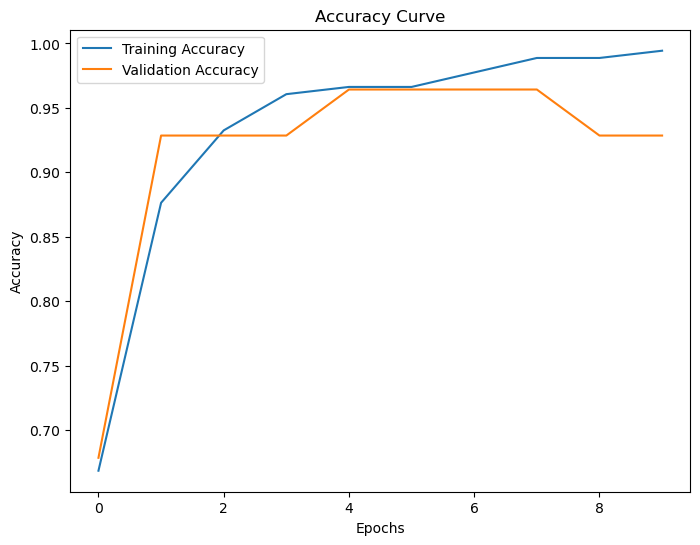

In [31]:
# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the AUC curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Load the saved model
model = tf.keras.models.load_model('model_checkpoint.h5')

1/1 [==============================] - 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

      banana       0.00      0.00      0.00         0
     cassava       1.00      1.00      1.00         7
       grass       1.00      1.00      1.00         2
       maize       1.00      0.86      0.92         7

    accuracy                           0.94        16
   macro avg       0.75      0.71      0.73        16
weighted avg       1.00      0.94      0.97        16

Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

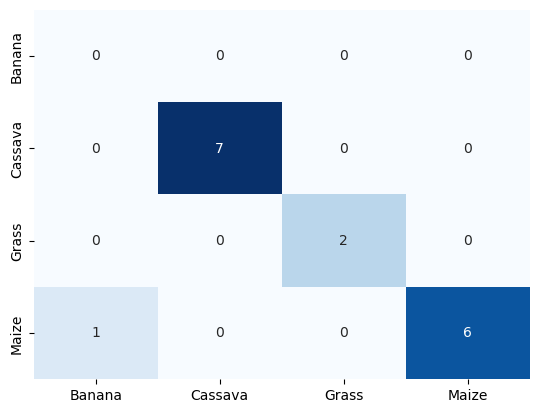

In [34]:
# Get the true labels for the validation set
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Get the predicted labels for the validation set
y_pred_prob = model.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")

label_names = ['Banana', 'Cassava', 'Grass', 'Maize']


sn.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
           xticklabels=label_names, yticklabels=label_names)